In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

# Pandas

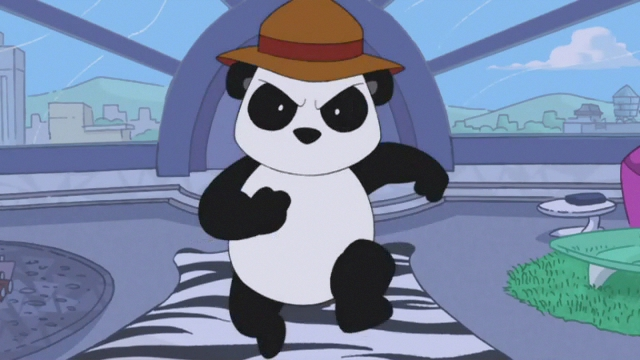

In [2]:
from IPython.display import Image
Image(filename='PeterPanda2-phineas-pherb.jpg',width=400)

# Automated Pandas?

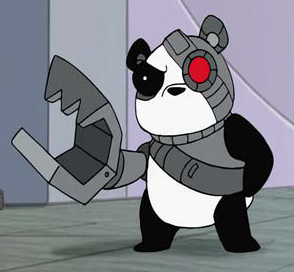

In [3]:
from IPython.display import Image
Image(filename='Pandaborg.jpg',width=400)

Today we want to automate a few things in pandas.  this means we will need to clean up our coding and call things in a better method.  I will walk you through it.  Lets read in our file and get started.  We will use well_data.csv again.  Look on courseworks and you will see our goal is making a file with the graphs we want.  I kept the df in the name as it is a dataframe

In [4]:
pwd

'C:\\work-teaching\\python\\fall18\\BigDataPython'

In [5]:
df_well_data=pd.read_csv('well_data.csv')

Now instead of using 'As' lets set i to 'As' and try and call it. **Remember** I am using head() to save space printing. You do not need it for class.

In [6]:
i='As'
df_well_data[i].head()

0         NaN
1         NaN
2         NaN
3    78.97747
4         NaN
Name: As, dtype: float64

We can also do fucntions on it.  Lets call dtype which tells us the data type.

In [7]:
i='As'
df_well_data[i].dtype

dtype('float64')

now try setting i to Drink

dtype('O')

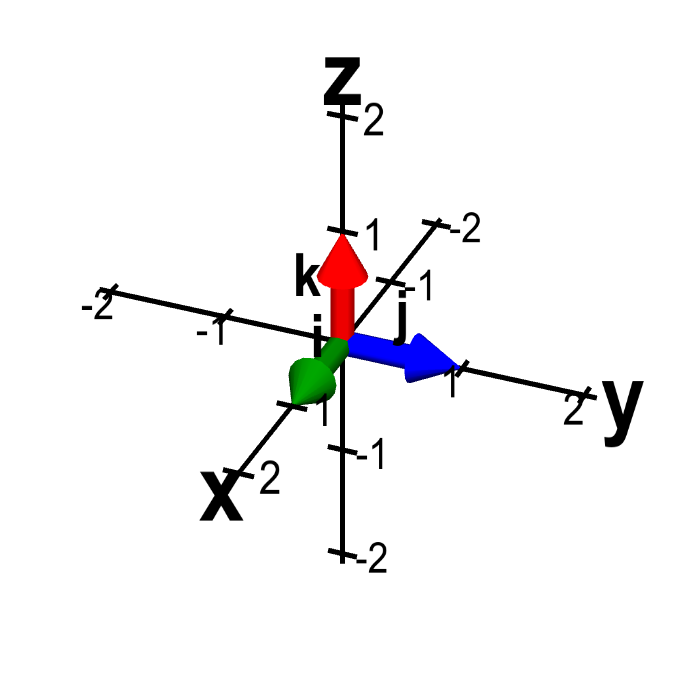

In [8]:
from IPython.display import Image
Image(filename='standard_unit_vectors_3d.png',width=400)  #copied from http://mathinsight.org/cross_product_formula

I am not going to go into it. But i,j,k are used for vectors in math and are thus the common names people iterate over.  So i,j,k is the vector in x,y,z space. But you could call it anything.  But i,j,k are simple and easy

In [9]:
I_need_to_think_of_a_better_name='As'
df_well_data[I_need_to_think_of_a_better_name].head()

0         NaN
1         NaN
2         NaN
3    78.97747
4         NaN
Name: As, dtype: float64

now what if we wanted to print the datatypes one by one.  we could use a for loop.  The nice thing about Pandas is you can iterate over the types.  


In [11]:
for i in df_well_data:
    print (i)

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


Now that you know how to iterate can you go through and print each data type?  

Well_ID  is of type  int64
Lat  is of type  float64
Lon  is of type  float64
Depth  is of type  int64
Drink  is of type  object
Si  is of type  float64
P  is of type  float64
S  is of type  float64
Ca  is of type  float64
Fe  is of type  float64
Ba  is of type  float64
Na  is of type  float64
Mg  is of type  float64
K  is of type  float64
Mn  is of type  float64
As  is of type  float64
Sr  is of type  float64
F  is of type  float64
Cl  is of type  float64
SO4  is of type  float64
Br  is of type  float64


We could use our format to make it cleaner and look prettier.  

Well_ID is of type int64 
Lat     is of type float64
Lon     is of type float64
Depth   is of type int64 
Drink   is of type object
Si      is of type float64
P       is of type float64
S       is of type float64
Ca      is of type float64
Fe      is of type float64
Ba      is of type float64
Na      is of type float64
Mg      is of type float64
K       is of type float64
Mn      is of type float64
As      is of type float64
Sr      is of type float64
F       is of type float64
Cl      is of type float64
SO4     is of type float64
Br      is of type float64


Now lets get our code for printing a graph and instead of saying As. Lets put in i.  this is my original HW answer.  

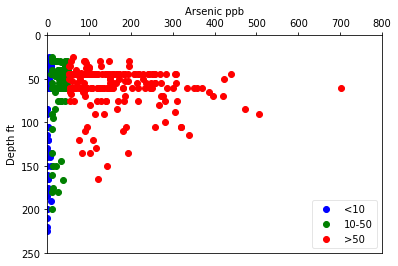

In [34]:
fig,ax=plt.subplots()

#plot <10
ax.scatter(df_well_data.As[df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
#plot 10-50
ax.scatter(df_well_data.As[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
           df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
#plot<50
ax.scatter(df_well_data.As[df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel('Depth ft')
ax.set_xlim([0,800])
ax.set_ylim([250,0])
plt.legend(loc=4, fancybox=True, framealpha=0.5)

Now lets try it with i='As'. But we want to keep the As cutoffs.  So don't change the cutoffs.  We want to be able to plot a different parameter other than As but still color the points by arsenic.  So keep the As boolean calls but change the other .As to [i]

-  So where we call arsenic to plot X change it to [i]
-  you can not do .i
-  DO NOT add it to where you do the boolean arsenic calls for coloring. Keep those seperate. you will see why in a mintue


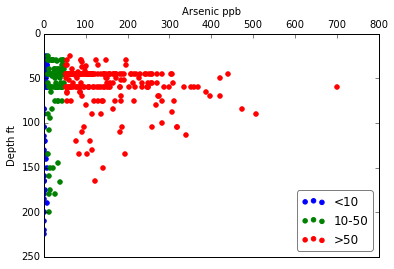

In [49]:
i='As'


Now lets change i from As to Fe

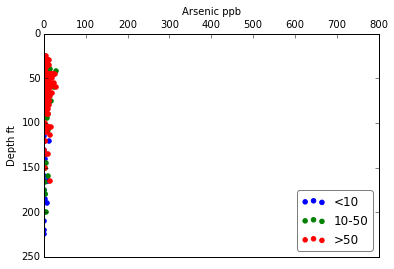

Do you like the axis lengths and titles?  What can we do?  Can you set xlim and xlabel to automatically choose the right thing?  Or don't use an set_xlim. It depends how things look.

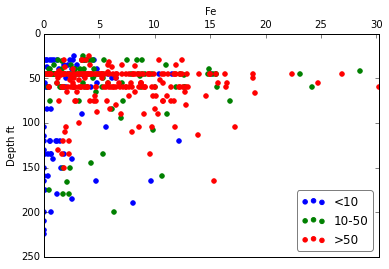

### What does this graph mean?  

In many areas Arsenic is associated with high Iron (Fe). do we se that here?  Maybe? Sometimes? Always?

Can you now plot a different column?  Choose one and see if it works.  

If you forget the column names...

In [43]:
df_well_data.columns

Index(['Well_ID', 'Lat', 'Lon', 'Depth', 'Drink', 'Si', 'P', 'S', 'Ca', 'Fe',
       'Ba', 'Na', 'Mg', 'K', 'Mn', 'As', 'Sr', 'F', 'Cl', 'SO4', 'Br'],
      dtype='object')

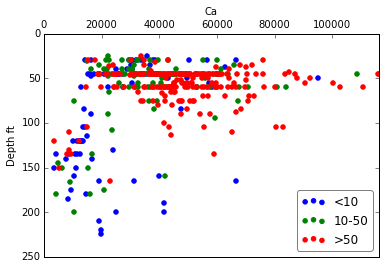

## Read these notes carefully and take your time. The devil is in the details

But I want a file with all the parameters.  So we still need to learn two things.  How to write to files and then how to loop.  Lets do them one at a time.  For a file we want pdf becuase we can do multiple pages.  so if we google matplotlib write to file we get this faq page http://matplotlib.org/faq/howto_faq.html and then we can click to http://matplotlib.org/faq/howto_faq.html#save-multiple-plots-to-one-pdf-file   so we need to import from matplotlib.backends.backend_pdf import PdfPages which we did above.  then it is three steps.

1.  Open the file.  pp = PdfPages('multipage.pdf')
2.  save the graph.  pp.savefig()
3.  Close the file so we can open it somewhere else. pp.close()

so basically pp references our file and we are doing things to it.  
so lets try it.  

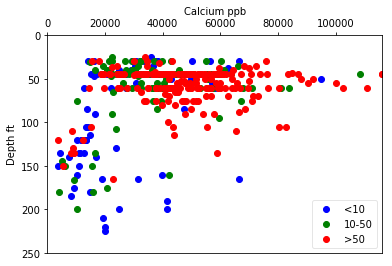

In [48]:
pp = PdfPages('filetest.pdf')

i='Ca'
fig,ax=plt.subplots()

#plot <10
ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
#plot 10-50
ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
           df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
#plot<50
ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Calcium ppb')
ax.set_ylabel('Depth ft')
ax.set_xlim([0,df_well_data[i].max()])
ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

pp.savefig()
pp.close()

Hopefully you now have a file.  files can get buggy.  I usually have to delete the file before running the program and sometimes have to change file names.  But it is nice.

Now lets try and add a for loop around the graphs and see if we can plot them all.  remember to put the open and close outside of the for loop.   Also, we need to make our subplots outside the for loop.  This will make more sense later.  But for my first try I got an error! Lets see what we get! 

ValueError: First argument must be a sequence

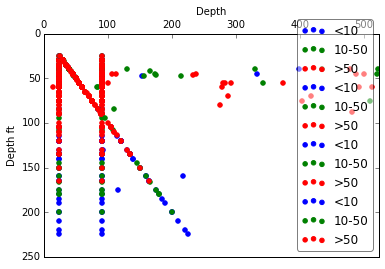

You should get an error and not be able to open the file.  If the graphs are not showing we need to debug. I would add a line where it prints i out every time through the for loop so you can see the progress.  Also, as you can see it plotted a lot of stuff on top of each other. That is because we only have one graph window open. We either need to close it or clear it everytime.  to close use ax.cla to clear the axes. So once you are done with a grpah and you have saved it. do ax.cla() and this clears out the axes and gets ready for you to plot again.   

So we are fixing two things to try and find out error.  First let's add 
ax.cla() which clears out the axes.

then lets print at each time through the for loop so we can see where an error occurs.  

Well_ID
Lat
Lon
Depth
Drink

ValueError: First argument must be a sequence

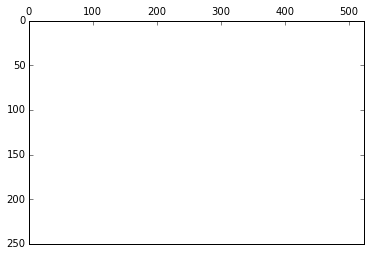

We still can't open the file b/c it is not closing correctly.  But now because we are printing i during each for loop you can see that we crash at drink. Drink is a string.  so we could check the dtype to make sure it is a float and then make a graph for floats.  I also changed the file name b/c I have trouble writing over these ones that end in an error.  

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


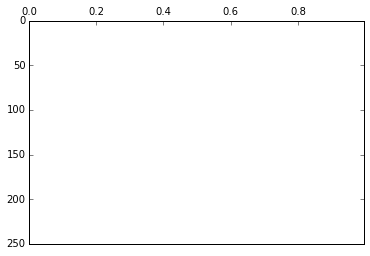

Almost there.  We just don't need Lat and lon so we could start the loop later.  

Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


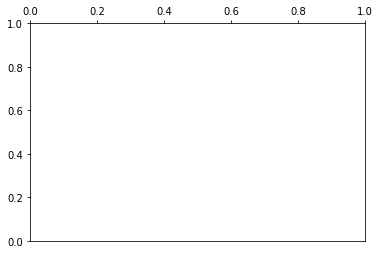

In [58]:
pp = PdfPages('filetest6.pdf')
fig,ax=plt.subplots()
for i in df_well_data.iloc[:,5:]:
    print(i)
    if df_well_data[i].dtype==float:
        #plot <10
        ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
        #plot 10-50
        ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
                   df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
        #plot<50
        ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
        ax.set_xlabel(i)
        ax.set_ylabel('Depth ft')
        ax.set_xlim([0,df_well_data[i].max()])
        ax.set_ylim([250,0])
        ax.legend(loc=4, fancybox=True, framealpha=0.5)
        pp.savefig()
        ax.cla()

pp.close()

### you should now have a file with all your data.  I love that.  

Now after looking at all the data I realize I want to plot As, F, S on 3 plots next to each other.  lets see if we can do this.  here is an example. http://matplotlib.org/examples/pylab_examples/subplots_demo.html  So if you look I want to share a y-axis.  Lets try..... Lets see if we can learn. I am nervous as these plot always give me trouble so I going to start simple and just use our code for plotting less than 10.   In subplots we will get three sets of axes.  One for each plot.  Also, I am telling it to give me 1 row by 3 columns.  then we are going to share the y-axes.  To make thigs easier I am going to just show the less than 10 data first. Also since we have 3 plots on one page we have 1 fig and 3 ax values.  

For this work I was using i to call the element name.  You can use any variable name to name the integer.  Go back into your code and change i to something more intuitive.  It could be j? it could be k?  It could be element_name.  It could be I_CANT_THINK_OF_ANYTHING  It is your choice. But change the name and make it work again! 

(250, 0)

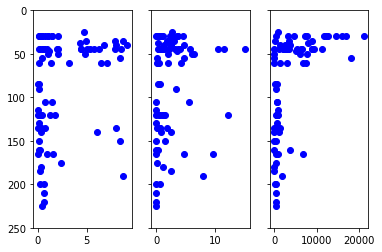

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
i='As'
ax1.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
i='Fe'
ax2.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
i='S'
ax3.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')

ax1.set_ylim([250,0])

First step is I am going to make my ax into a list.

(250, 0)

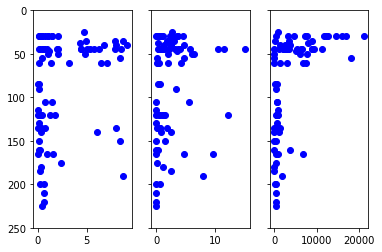

In [61]:
fig, ax = plt.subplots(1, 3, sharey=True)
i='As'
ax[0].scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
i='Fe'
ax[1].scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
i='S'
ax[2].scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')

ax[0].set_ylim([250,0])

That is really encouraging.  But we have to get rid of the hardwires and do it in a for loop eventually.  This way we could just choose our parameters and it would do it. So lets go back and do for loops.

In [63]:
elems=['As','Fe','S']
for elem in elems:
    print (elem)

As
Fe
S


Now we could look at each of those data.

In [65]:
elems=['As','Fe','S']
for elem in elems:
    print (df_well_data[elem].head(),'\n')

0         NaN
1         NaN
2         NaN
3    78.97747
4         NaN
Name: As, dtype: float64 

0         NaN
1         NaN
2         NaN
3    1.260031
4         NaN
Name: Fe, dtype: float64 

0            NaN
1            NaN
2            NaN
3    2085.570979
4            NaN
Name: S, dtype: float64 



## Flashback to for loops.  This is what I wrote in the notes! 

Python has a simple trick to count through a list and give you the list.  It may not make sense now but it will later in the semester!

This is the example I gave.

In [66]:
mystrlist=['env','chem','bio','psych']
for i,mystr in enumerate(mystrlist):
    print (i,mystr)

0 env
1 chem
2 bio
3 psych


Now lets do it for our elements!

In [67]:
elems=['As','Fe','S']
for count,elem in enumerate(elems):
    print (count,elem)

0 As
1 Fe
2 S


Lets keep getting rid of hard wires.  Now instead of doing subplots(1,3) lets use the length of elems! 

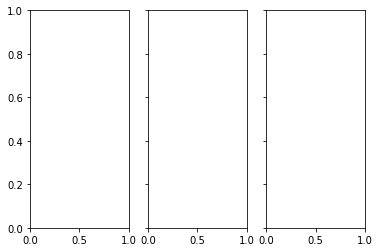

In [68]:
elems=['As','Fe','S']
fig, ax = plt.subplots(1, len(elems), sharey=True)


Now lets add our for loop to after we make the plots.  

0 As
1 Fe
2 S


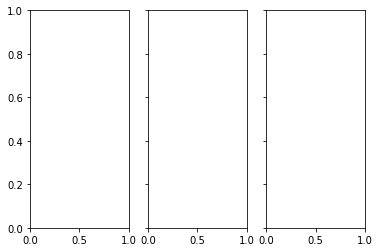

In [69]:
elems=['As','Fe','S']
fig, ax = plt.subplots(1, len(elems), sharey=True)
for count,elem in enumerate(elems):
    print (count,elem)

Now instead of printing lets call the correct ax and plot the elements.  

(250, 0)

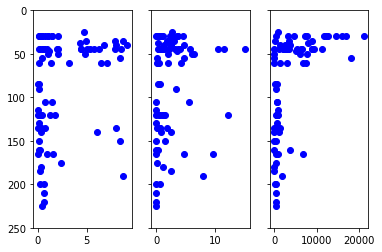

In [70]:
elems=['As','Fe','S']
fig, ax = plt.subplots(1, len(elems), sharey=True)
for count,elem in enumerate(elems):
    ax[count].scatter(df_well_data[elem][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
ax[0].set_ylim([250,0])

Now lets add the full data set!

(250, 0)

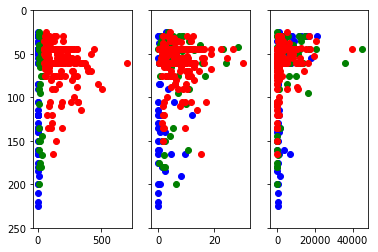

In [71]:
elems=['As','Fe','S']
fig, ax = plt.subplots(1, len(elems), sharey=True)
for count,elem in enumerate(elems):
    ax[count].scatter(df_well_data[elem][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
    ax[count].scatter(df_well_data[elem][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
                      df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='<10')
    ax[count].scatter(df_well_data[elem][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='<10')
ax[0].set_ylim([250,0])

This is looking great.  Lets see if we can clean it up.  Lets fix the axis labels automaticaly and set the x limits to start at 0 and end at max.  Also, lets label the y axis.  and make the whole thing bigger!  
I use fig.set_size_inches(width,height)
then I use ax.locator_params(nbins=4,axis='x') to set the number of ticks on the x axis.  

(250, 0)

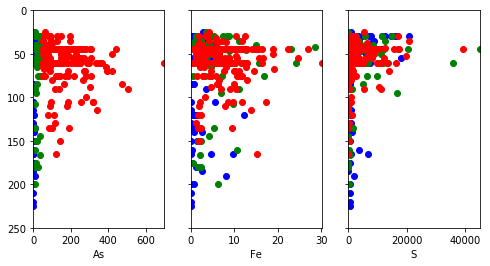

In [76]:
elems=['As','Fe','S']
fig, ax = plt.subplots(1, len(elems), sharey=True)
fig.set_size_inches(8,4)
for count,elem in enumerate(elems):
    ax[count].scatter(df_well_data[elem][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
    ax[count].scatter(df_well_data[elem][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
                      df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='<10')
    ax[count].scatter(df_well_data[elem][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='<10')
    
    ax[count].set_xlabel(elem) #labels with the element
    ax[count].set_xlim(0,np.max(df_well_data[elem])) #sets the limit to the maximum
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
ax[0].set_ylim([250,0])


To prove this works add two more parameters to elem.  And we can save it to a jpeg or png!
fig.savefig('namemyfig.png')

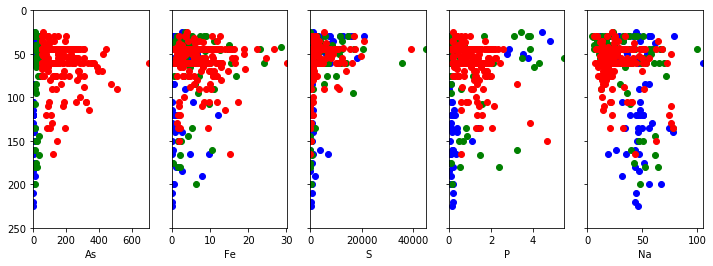

In [78]:
elems=['As','Fe','S','P','Na']
fig, ax = plt.subplots(1, len(elems), sharey=True)
fig.set_size_inches(12,4)
for count,elem in enumerate(elems):
    ax[count].scatter(df_well_data[elem][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
    ax[count].scatter(df_well_data[elem][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
                      df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='<10')
    ax[count].scatter(df_well_data[elem][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='<10')
    
    ax[count].set_xlabel(elem) #labels with the element
    ax[count].set_xlim(0,np.max(df_well_data[elem])) #sets the limit to the maximum
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
ax[0].set_ylim([250,0])
fig.savefig('namemyfig.png')

Now as I am prepping for class I realize that it is hard to see all the points on the graph.  So i think we should make them transparent or open.  Transparencey is controlled by alpha.  alpha= and then a number less than 1.  

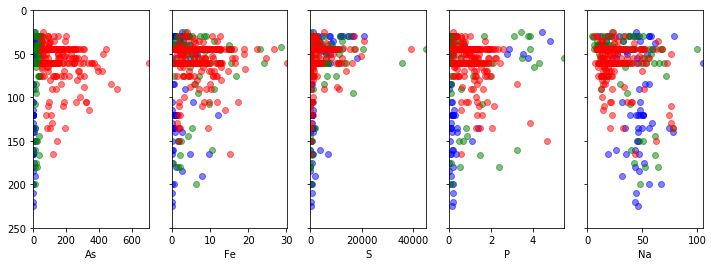

In [79]:

elems=['As','Fe','S','P','Na']
fig, ax = plt.subplots(1, len(elems), sharey=True)
fig.set_size_inches(12,4)
for count,elem in enumerate(elems):
    ax[count].scatter(df_well_data[elem][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10',alpha=0.5)
    ax[count].scatter(df_well_data[elem][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
                      df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='<10',alpha=0.5)
    ax[count].scatter(df_well_data[elem][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='<10',alpha=0.5)
    
    ax[count].set_xlabel(elem) #labels with the element
    ax[count].set_xlim(0,np.max(df_well_data[elem])) #sets the limit to the maximum
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
ax[0].set_ylim([250,0])
fig.savefig('namemyfig.png')



If you don't like the transparency you could instead try open circles instead.  To do this you use the key words

facecolor='none'  this is saying no colors filling in.  You could set this color.

edgecolors=  This sets the edgecolor instead of the whole color

We almost forgot a y label!

That appears nicer! 

# Answers

In [13]:
i='Drink'
df_well_data[i].dtype

dtype('O')

In [27]:
for i in df_well_data:
    print (i,' is of type ',df_well_data[i].dtype)

Well_ID  is of type  int64
Lat  is of type  float64
Lon  is of type  float64
Depth  is of type  int64
Drink  is of type  object
Si  is of type  float64
P  is of type  float64
S  is of type  float64
Ca  is of type  float64
Fe  is of type  float64
Ba  is of type  float64
Na  is of type  float64
Mg  is of type  float64
K  is of type  float64
Mn  is of type  float64
As  is of type  float64
Sr  is of type  float64
F  is of type  float64
Cl  is of type  float64
SO4  is of type  float64
Br  is of type  float64


In [28]:
for i in df_well_data:
    print ('{:7s} is of type {:7s}'.format(i,str(df_well_data[i].dtype)))

Well_ID is of type int64  
Lat     is of type float64
Lon     is of type float64
Depth   is of type int64  
Drink   is of type object 
Si      is of type float64
P       is of type float64
S       is of type float64
Ca      is of type float64
Fe      is of type float64
Ba      is of type float64
Na      is of type float64
Mg      is of type float64
K       is of type float64
Mn      is of type float64
As      is of type float64
Sr      is of type float64
F       is of type float64
Cl      is of type float64
SO4     is of type float64
Br      is of type float64


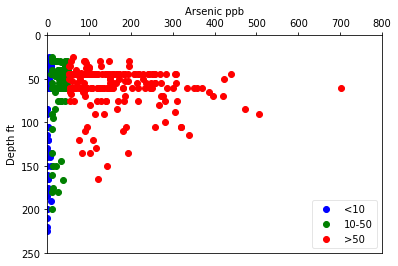

In [42]:
i='As'

fig,ax=plt.subplots()

#plot <10
ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
#plot 10-50
ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
           df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
#plot<50
ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel('Depth ft')
ax.set_xlim([0,800])
ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

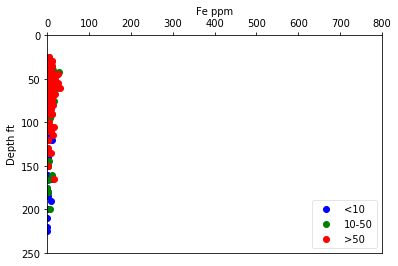

In [47]:
i='Fe'

fig,ax=plt.subplots()

#plot <10
ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
#plot 10-50
ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
           df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
#plot<50
ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Fe ppm')
ax.set_ylabel('Depth ft')
ax.set_xlim([0,800])
ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

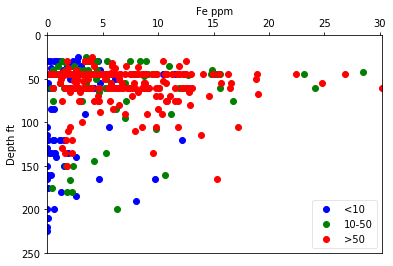

In [46]:
i='Fe'

fig,ax=plt.subplots()

#plot <10
ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
#plot 10-50
ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
           df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
#plot<50
ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Fe ppm')
ax.set_ylabel('Depth ft')
ax.set_xlim([0,df_well_data[i].max()])
ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

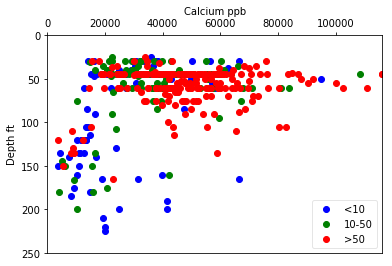

In [45]:
i='Ca'
fig,ax=plt.subplots()

#plot <10
ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
#plot 10-50
ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
           df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
#plot<50
ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Calcium ppb')
ax.set_ylabel('Depth ft')
ax.set_xlim([0,df_well_data[i].max()])
ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

TypeError: '>=' not supported between instances of 'str' and 'float'

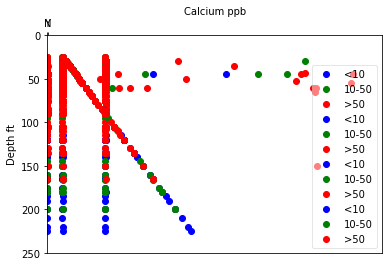

In [50]:
pp = PdfPages('filetest3.pdf')
fig,ax=plt.subplots(1,1)
for i in df_well_data:
    
    #plot <10
    ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
    #plot 10-50
    ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
               df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
    #plot<50
    ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xlabel('Calcium ppb')
    ax.set_ylabel('Depth ft')
    ax.set_xlim([0,df_well_data[i].max()])
    ax.set_ylim([250,0])
    ax.legend(loc=4, fancybox=True, framealpha=0.5)
    pp.savefig()

pp.close()

Well_ID
Lat
Lon
Depth
Drink


TypeError: '>=' not supported between instances of 'str' and 'float'

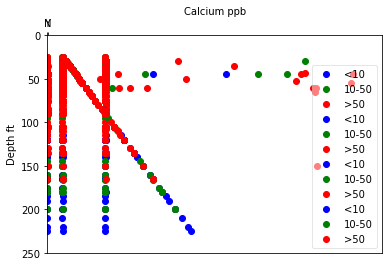

In [51]:
pp = PdfPages('filetest3.pdf')
fig,ax=plt.subplots(1,1)
for i in df_well_data:
    print(i)
    #plot <10
    ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
    #plot 10-50
    ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
               df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
    #plot<50
    ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xlabel('Calcium ppb')
    ax.set_ylabel('Depth ft')
    ax.set_xlim([0,df_well_data[i].max()])
    ax.set_ylim([250,0])
    ax.legend(loc=4, fancybox=True, framealpha=0.5)
    pp.savefig()

pp.close()

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


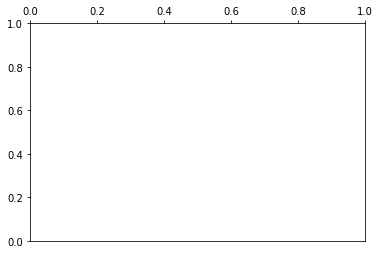

In [56]:
pp = PdfPages('filetest5.pdf')
fig,ax=plt.subplots()
for i in df_well_data:
    print(i)
    if df_well_data[i].dtype==float:
        #plot <10
        ax.scatter(df_well_data[i][df_well_data.As<10],df_well_data.Depth[df_well_data.As<10],color='b',label='<10')
        #plot 10-50
        ax.scatter(df_well_data[i][np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],\
                   df_well_data.Depth[np.logical_and(df_well_data.As>=10,df_well_data.As<=50)],color='g',label='10-50')
        #plot<50
        ax.scatter(df_well_data[i][df_well_data.As>50],df_well_data.Depth[df_well_data.As>50],color='r',label='>50')

        ax.xaxis.set_label_position('top')
        ax.xaxis.tick_top()
        ax.set_xlabel(i)
        ax.set_ylabel('Depth ft')
        ax.set_xlim([0,df_well_data[i].max()])
        ax.set_ylim([250,0])
        ax.legend(loc=4, fancybox=True, framealpha=0.5)
        pp.savefig()
        ax.cla()

pp.close()